### Problem Statement

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. **From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India.** It becomes really difficult to find the best place with all the amenities such as **high-speed internet, a comfortable stay as well as within the budget.** To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. **Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.**

In this competition, one has to use the knowledge of machine learning, deep learning, and **model building to predict the price per person for your next workstation trip**. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

Attributes:

* Uniq Id - Unique Identifier per row sample
* Package Name - Name of the tour package
* Package Type - Type of the tour package
* Destination - A destination place
* Itinerary - complete itinerary
* Places Covered - covered places in the itinerary
* Travel Date - Date of travel
* Hotel Details - Details of the hotel stay
* Start City - Start place for the travel
* Airline - Flight details
* Flight Stops - Intermediate stops if any
* Meals - Inflight meals or services
* Sightseeing Places Covered - Itinerary details regarding sightseeing
* Cancellation Rules - Cancellation policy as per travel company
* Per Person Price - Price of the tour package per person (Target Column)*

In [1]:
# Importing the Required Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

In [124]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")


In [3]:
# Lets preview the dataset

train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [125]:
# Combine Train and Test

combined = pd.concat([train, test], ignore_index = True)
train.shape, test.shape, combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [26]:
combined.head(10)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0
5,3bb074528941b3a6823371f77b07fb0f,Cochin Trip with Visit to Guruvayoor Temple,Deluxe,Cochin,2N Cochin,Cochin,30-09-2021,Not Available,Mumbai,IndiGo,1,3,Dutch Palace | Jewish Synagogue | St. Francis...,Not Available,8512.0
6,644c71b1a9ccfe6eacc6303be12c1352,Jaipur Holiday,Standard,Jaipur,3N Jaipur,Jaipur,24-01-2021,Ratnawali A Vegetarian Heritage Hotel:4.1,New Delhi,IndiGo,2,3,Hawa Mahal | City Palace | Jantar Mantar | Am...,Cancellation any time after making the 1st pay...,6848.0
7,07943295cfdce5cb20861e8369948b1d,Kasol & Manali holiday from Delhi,Deluxe,Kasol|Manali,2N Kasol . 3N Manali,Kasol|Manali,10-12-2021,The Himalayan Village:Four|The Holiday Resorts...,Mumbai,Not Available,1,3,Pandoh Dam | Hadimba Temple | Tibetan Monaste...,Cancellation any time after making the 1st pay...,14454.5
8,126e12c63233bf11ef2e001a062f2a53,Charismatic Kashmir with Gulmarg,Deluxe,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 2N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,03-10-2021,California Group of Houseboats:3.6|The Rosewoo...,New Delhi,IndiGo,1,3,Dal Lake | Gondola Point | Avantipura Ruins |...,Cancellation any time after making the 1st pay...,21556.5
9,72aeb7bac6d5600fe443fca06e3db631,Luxury Getaway to Udaipur - Stay at the Chunda...,Premium,Udaipur,2N Udaipur,Udaipur,15-08-2021,Chunda Palace:4.6,Mumbai,IndiGo,0,5,Lake Pichola | Jag Mandir Palace | Sajjangarh...,This cancellation policy is applicable for boo...,13042.0


In [46]:
combined["Destination"][3].replace(" and ","|")

'Munnar|Kumarakom|Allepey|Kovalam|Poovar'

In [126]:
combined.loc[combined["Destination"]=="Munnar|Kumarakom|Allepey|Kovalam and Poovar", "Destination"]=\
'Munnar|Kumarakom|Allepey|Kovalam|Poovar'

In [55]:
text = "Munnar|Allepey"
if "and" in text:
  newtext = text.replace(" and ", "|")
else:
  print(text)

print(text)
print(newtext)

Munnar|Allepey
Munnar|Allepey
Munnar|Allepey|Kovalam|Poovar


In [127]:
def and_(x):
  if "and" in x:
    return x.replace(" and ", "|")
  else:
    return x


In [74]:
df = pd.DataFrame({"location": ["Jaipur|Ajmer", "Himanchal|UK| and Uttarakhand"]})

In [75]:
df["location"].apply(and_)

0                 Jaipur|Ajmer
1    Himanchal|UK||Uttarakhand
Name: location, dtype: object

In [128]:
# Destination
combined["Destination"]  = combined.Destination.apply(and_)

In [129]:
# Count of Places Visited

places = []
for i in combined.Destination:
  places.append(len(i.split("|")))

combined["Count_Destination"] = pd.Series(places)

In [130]:
# Sight Seeing Places Covered
combined["Sightseeing Places Covered"]  = \
combined["Sightseeing Places Covered"].apply(and_)

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Count_Destination'],
      dtype='object')

In [131]:
ss =[]

for i in combined["Sightseeing Places Covered"]:
  ss.append(len(i.split("|")))

# New Feature - Count of Sightseeing places
combined["Count_SS"] = pd.Series(ss)

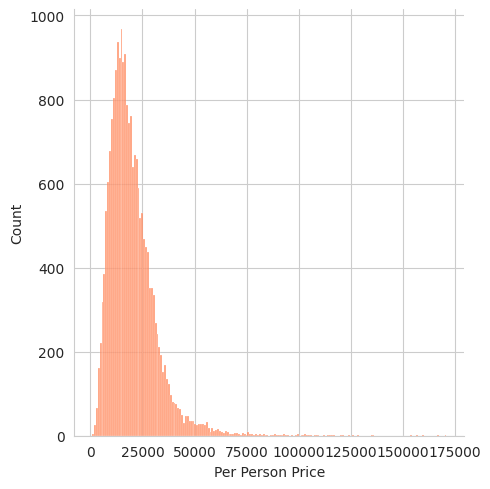

In [132]:
# Lets analyse the Target variable...Prices, Revenues, Profits...+vely Skewed...

sns.displot(combined["Per Person Price"], color = "coral")
plt.show()

In [133]:
combined["Per Person Price"].describe()

count     21000.000000
mean      20059.330381
std       11643.641766
min         791.000000
25%       12461.000000
50%       17765.500000
75%       25081.375000
max      171062.500000
Name: Per Person Price, dtype: float64

In [87]:
combined.head(2)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_SS
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7


In [134]:
# FLights = Not Available

combined.loc[(combined["Airline"]=="Not Available") &
 (combined["Flight Stops"]==0) & (combined["Meals"]!=0)]

 # As per the Data, people have ordered meals irrespective of flight information.
 # This suggests that all the customers in the data have opted for flights...
 # Now we will find out the count of flights for each passenger

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_SS
18,d26163e7ff27bf1e8637728c785df0db,A Relaxing Rendezvous in Himachal from Delhi,Luxury,Shimla|Manali|Dharamshala,2N Shimla . 3N Manali . 2N Dharamshala,Shimla|Manali|Dharamshala,27-11-2021,Not Available,Mumbai,Not Available,0,4,Kufri | Mall road | Viceregal Lodge | Pandoh ...,Cancellation any time after making the 1st pay...,20739.0,3,7
27,d8c2cf32f9feb23785e619306e565159,Gangtok Pelling & Darjeeling Holidays with Sha...,Premium,Gangtok|Pelling|Darjeeling,3N Gangtok . 1N Pelling . 2N Darjeeling,Gangtok|Pelling|Darjeeling,13-04-2021,Not Available,Mumbai,Not Available,0,5,Baba Mandir | Changu Lake | Rumtek Monastery ...,Cancellation any time after making the 1st pay...,13465.0,3,14
32,667806187e7ce471bbbde18af6998064,Take a Break in Shimla - Personal Photoshoot i...,Luxury,Shimla,3N Shimla,Shimla,26-03-2021,Not Available,Mumbai,Not Available,0,4,Shimla Church | Scandal point | Gaeity Theatr...,Not Available,22910.0,1,14
35,097ecbfe889be8266ac81a8aad061ac3,Holiday in Lovely Himachal from Delhi,Luxury,New Delhi|Shimla|Manali|Chandigarh,2N New Delhi . 2N Shimla . 3N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,12-07-2021,Not Available,New Delhi,Not Available,0,4,Rajghat | Jama Masjid | Red fort | Chandni Ch...,Cancellation any time after making the 1st pay...,24753.5,4,20
68,9d22b15e32201b659bac2197aded3f90,Take a Break in Shimla - Personal Photoshoot i...,Premium,Shimla,3N Shimla,Shimla,03-05-2021,Not Available,New Delhi,Not Available,0,5,Shimla Church | Scandal point | Gaeity Theatr...,This cancellation policy is applicable for boo...,23723.5,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29964,d97b404a6903a85f7aec5f36c42a4343,Fabulous Himachal holiday from Delhi,Luxury,Shimla|Manali|Chandigarh|New Delhi,2N Shimla . 3N Manali . 1N Chandigarh . 1N New...,Shimla|Manali|Chandigarh|New Delhi,06-12-2021,Not Available,Mumbai,Not Available,0,4,Pinjore Gardens | Mall road | Kufri | Indira ...,Not Available,NaN,4,16
29977,64763752078f135a07c147de3805d466,Experiential Jaipur Holiday for Adventure Lovers,Premium,Jaipur,3N Jaipur,Jaipur,14-12-2021,RAMADA JAIPUR:4.1,New Delhi,Not Available,0,5,Hawa Mahal | City Palace | Jantar Mantar | Am...,Cancellation any time after making the 1st pay...,NaN,1,5
29981,7c5294f8743c5e8022279423170d8307,In the Lap of Nature - Shimla and Chail Holida...,Premium,Shimla|Chail,2N Shimla . 1N Chail,Shimla|Chail,19-07-2021,The Oberoi Cecil:Five|Fernhill Resort:Three,Mumbai,Not Available,0,5,Kufri | Viceregal Lodge | Mall road | Sadhu P...,This cancellation policy is applicable for boo...,NaN,2,6
29985,21f6b4d0bfdaa25b851fb72690715a55,Himachal Marvels from Chandigarh,Premium,Chandigarh|Shimla|Manali,1N Chandigarh . 2N Shimla . 3N Manali,Chandigarh|Shimla|Manali,02-11-2021,Not Available,Mumbai,Not Available,0,5,Rock Garden | Sukhna Lake | Rose Garden | Pin...,Not Available,NaN,3,11


In [135]:
# Extracting the Count of Flights taken...

combined["Airline"] = combined["Airline"].apply(and_)

combined["Count_Airline"] = combined.Airline.apply(lambda x:len(x.split("|")))

In [136]:
# Convert the Travel Date into Datetime....
combined["Travel Date"] = pd.to_datetime(combined["Travel Date"])

In [137]:
#combined.info()

# Extracting Date, Month and Year
combined["Date"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

In [138]:
# Month vs Target....
sns.set_style("whitegrid")
max_month = combined.groupby("Month")["Per Person Price"].max()

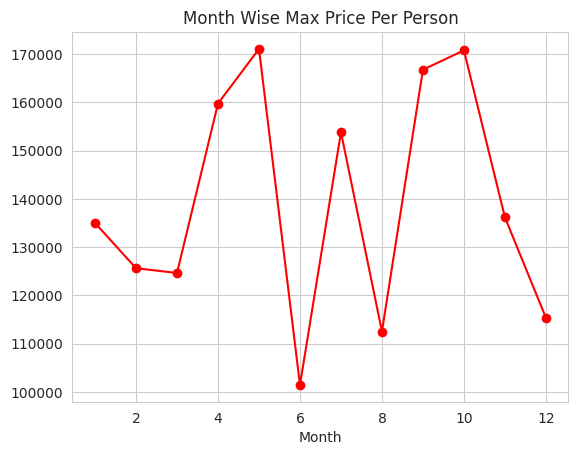

In [139]:
max_month.plot(kind = "line", color = "red", marker = "o")
plt.title("Month Wise Max Price Per Person")
plt.show() # 4, 5, 7, 9 10

In [140]:
peak = [4, 5, 7, 9, 10]

def peaks(x):
  if x in peak:
    return("High_Paying_Months")
  else:
    return("Lean_Months")

In [141]:
combined["Month_Cat"] = combined["Month"].apply(peaks)

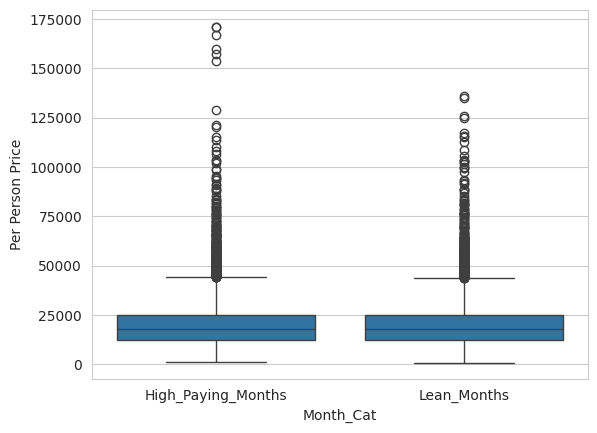

In [142]:
sns.boxplot(x = "Month_Cat", y = "Per Person Price", data = combined)
plt.show()

In [146]:
localdf=  combined.loc[0:train.shape[0]-1, ]

# We want to check if there is some pattern between the MOnths and Target...

# Ho: Month & Target Variable are Independent of Each Other..
# Ha: Ho is False. Month & Target are Related..
# Two Sample Independent T Test

import scipy.stats as stats

teststats, pvalue = stats.ttest_ind(localdf["Month"], localdf["Per Person Price"])
pvalue

0.0

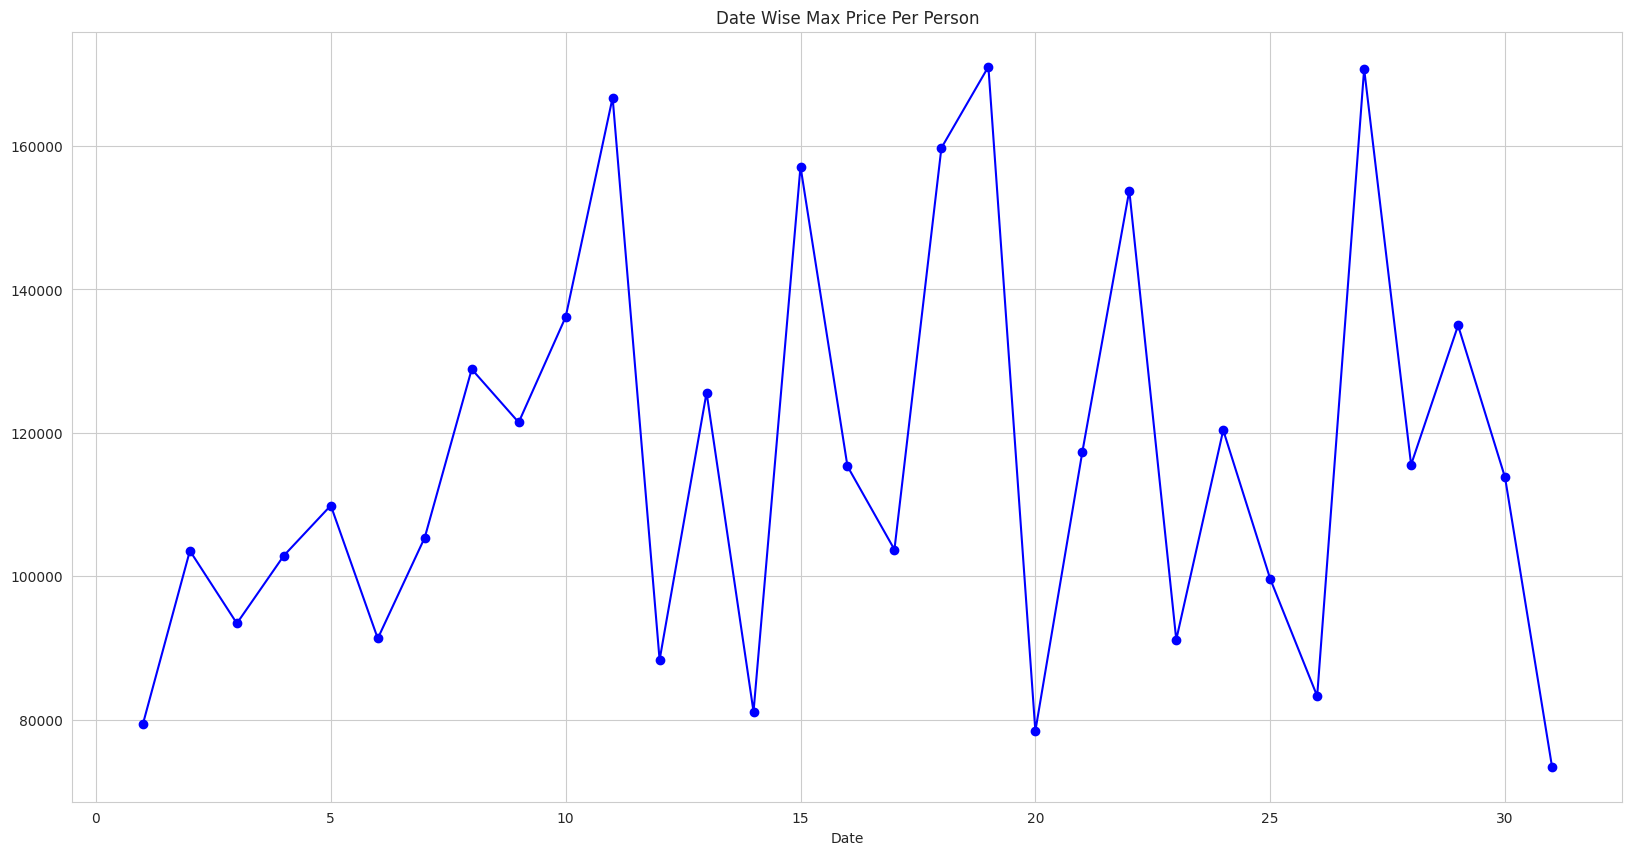

In [149]:
# Date vs Per Person Price...
max_dates = combined.groupby("Date")["Per Person Price"].max()

plt.figure(figsize = (20, 10))
max_dates.plot(kind = "line", color = "blue", marker = "o")
plt.title("Date Wise Max Price Per Person")
plt.show() # 5, 8, 10, 11, 13, 15, 18, 19, 22, 24, 27, 29

In [150]:
peak_dates = [5, 8, 10, 11, 13, 15, 18, 19, 22, 24, 27, 29]

def peaks(x):
  if x in peak_dates:
    return("High_Paying_Days")
  else:
    return("Lean_Days")

In [151]:
combined["Date_Cat"] = combined.Date.apply(peaks)

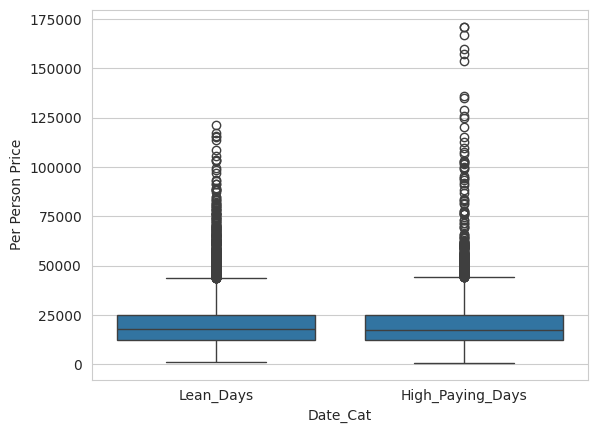

In [152]:
sns.boxplot(x ="Date_Cat", y = "Per Person Price", data = combined)
plt.show()

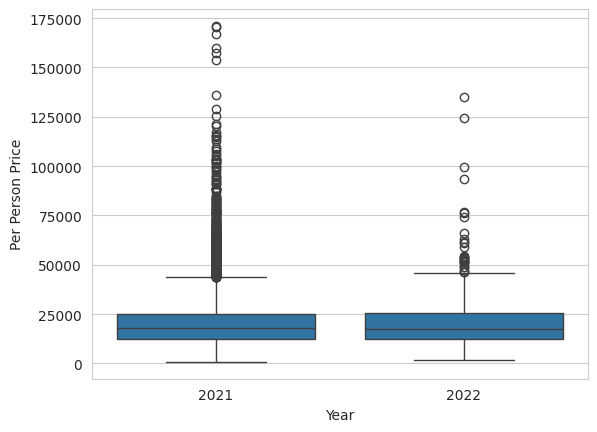

In [153]:
sns.boxplot(x ="Year", y = "Per Person Price", data = combined)
plt.show()

In [154]:
combined.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_SS,Count_Airline,Date,Month,Year,Month_Cat,Date_Cat
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,30,7,2021,High_Paying_Months,Lean_Days


In [156]:
combined["Itinerary"].unique()[0]

# Regular Expression....


'1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh'

### Regex

In [158]:
text = "The Just Dial Contact Number is 08888888888 and their revenue for 2023-24 has been $100 Mils."

print(text)

The Just Dial Contact Number is 08888888888 and their revenue for 2023-24 has been $100 Mils.


In [163]:
# Extract the Phone Number from the above text
import re

print("Phone No:", re.findall("\d{11}", text))
print("Revenue: ", re.findall("\d+", text)[-1])

Phone No: ['08888888888']
Revenue:  100


In [164]:
text = "The Just Dial Contact Number is 08888888888 and their revenue for 2023-24 has been $100 Mils. However, the CEO number of Just Dial is (999)-233-4666."
re.findall("\d{11}|\(\d{3}\)-\d+\-\d+", text)

['08888888888', '(999)-233-4666']

In [168]:
travel = "1N New Delhi . 2N Shimla . 2N Manali . 1N Chandigarh"

np.sum(pd.to_numeric(re.findall("\d+", travel)))

6

In [170]:
combined["Duration"]= combined.Itinerary.apply(lambda x:np.sum(pd.to_numeric(re.findall("\d+", x))))

In [171]:
combined["Hotel Details"].unique() # \d.\d

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5',
       'The Oberoi Cecil:Five|Fernhill Resort:Three',
       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'],
      dtype=object)

In [184]:
travel = "Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5 or any beach 8:4"

if ":" in re.findall("\d.\d", travel):
  new= travel.replace(":", ".")
  print(new)
else:
  print(travel)

Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5 or any beach 8:4


In [185]:
combined["rating"] = combined["Hotel Details"].apply(lambda x:np.mean(pd.to_numeric(re.findall("\d\.\d", x))))



In [188]:
combined.loc[combined.rating.isnull(), "Hotel Details"].unique()

array(['Not Available',
       'The Himalayan Village:Four|The Holiday Resorts, Cottages & Spa:Four',
       'UDAY SAMUDRA LEISURE BEACH HOTEL & SPA-MMT Holidays Special:4|Hotel Sivamurugan:',
       ..., 'Mayfair Hotel:Four|The Elgin Nor-Khill Hotel:Five',
       'Tea Village-MMT Holidays Special:4|Crown Valley-MMT Holidays Special:|Oxygen Resorts Alleppey-MMT Holidays Special:|Kshetra Ayurveda & Yoga Retreat, Varkala:|Over The Hill-MMT Holidays Special:',
       'The Oberoi Cecil:Five|Fernhill Resort:Three'], dtype=object)

In [192]:
combined["rating"].fillna(combined.rating.mean(), inplace = True)

In [194]:
combined.head() # Des, Iti, places, travel, hotel, airline, SS,Can

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Count_Destination,Count_SS,Count_Airline,Date,Month,Year,Month_Cat,Date_Cat,Duration,rating
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,30,7,2021,High_Paying_Months,Lean_Days,6,4.106857
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-12-08,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,8,12,2021,Lean_Months,High_Paying_Days,4,4.433333
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8,1,26,4,2021,High_Paying_Months,Lean_Days,3,4.400000
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam|Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,5,9,1,27,8,2021,Lean_Months,High_Paying_Days,6,4.500000
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2,2,12,12,2021,Lean_Months,Lean_Days,7,4.350000


In [195]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Count_Destination',
       'Count_SS', 'Count_Airline', 'Date', 'Month', 'Year', 'Month_Cat',
       'Date_Cat', 'Duration', 'rating'],
      dtype='object')

In [198]:
subset = combined.drop(["Uniq Id",'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Airline', 'Sightseeing Places Covered',
       'Cancellation Rules'], axis = 1)

In [199]:
subset.head()

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_Destination,Count_SS,Count_Airline,Date,Month,Year,Month_Cat,Date_Cat,Duration,rating
0,Best of Shimla and Manali Holiday from Delhi,Standard,Mumbai,2,3,11509.0,4,1,1,30,7,2021,High_Paying_Months,Lean_Days,6,4.106857
1,Kashmir Valley vacation,Premium,New Delhi,0,5,22485.5,3,7,2,8,12,2021,Lean_Months,High_Paying_Days,4,4.433333
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,New Delhi,0,4,12421.5,2,8,1,26,4,2021,High_Paying_Months,Lean_Days,3,4.400000
3,Colorful Kerala ( Romantic Getaway ),Premium,New Delhi,0,5,35967.0,5,9,1,27,8,2021,Lean_Months,High_Paying_Days,6,4.500000
4,A Week In Bangkok & Pattaya,Premium,New Delhi,0,5,25584.0,2,2,2,12,12,2021,Lean_Months,Lean_Days,7,4.350000


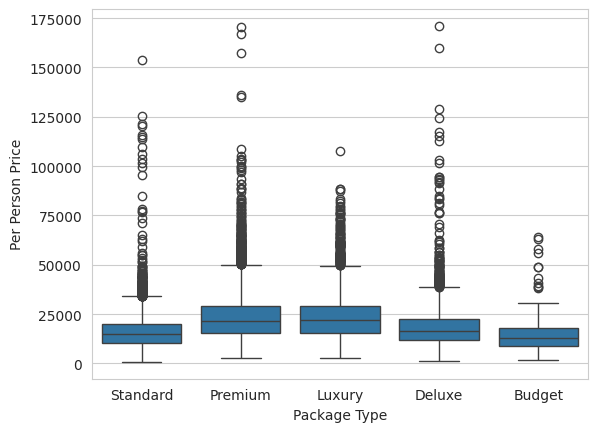

In [204]:
# Package

subset["Package Type"].unique()
sns.boxplot(x = "Package Type", y = "Per Person Price", data = subset)
plt.show()

In [205]:
# Encoding on Package...

combined.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [206]:
mapped = {"Deluxe": 5, "Premium": 4, "Standard": 3, "Luxury": 2, "Budget": 1}

subset["Package Type"] = subset["Package Type"].map(mapped)

In [209]:
# Package Vs Holiday (Duration)

subset.groupby("Package Type")["Duration"].describe()
subset["Count_Pkg_Holidays"] = subset.groupby("Package Type")["Duration"].transform("count")

In [212]:
# Package Name...
subset.groupby("Package Name")["Duration"].describe()
subset["Count_Pkg_Name_Holidays"] = subset.groupby("Package Name")["Duration"].transform("count")

In [214]:
# Dropping the addnl columns from subset
new = subset.drop(['Package Name', 'Start City', 'Date', 'Month'], axis = 1)

In [215]:
# Lets Split the Data into train and test
newtrain = new.loc[0:train.shape[0]-1, ]
newtest = new.loc[train.shape[0]:, ]

newtrain.shape, newtest.shape, train.shape, test.shape

((21000, 14), (9000, 14), (21000, 15), (9000, 14))

In [216]:
# Dropping the Target variable from the testset
newtest.drop("Per Person Price", axis = 1, inplace = True)

# Encoding the Categorical Variables

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

## Modelling

In [221]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X= dummytrain.drop("Per Person Price", axis = 1)
y = dummytrain["Per Person Price"]

rf = RandomForestRegressor()
pred_rf =rf.fit(X, y).predict(dummytest)

In [222]:
gbm = GradientBoostingRegressor()
gbm_pred= gbm.fit(X, y).predict(dummytest)

In [223]:
# Submission File.

rfmodel = pd.DataFrame({"Per Person Price": pred_rf})
rfmodel.to_csv("pred_rf.csv",index = False)

gmodel = pd.DataFrame({"Per Person Price": gbm_pred})
gmodel.to_csv("pred_gbm.csv",index = False)